# Optimización

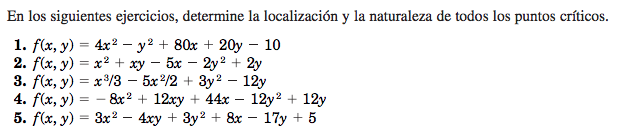

In [6]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [7]:
#problema 1
var ("x y f")
f = 4*(x**2) - y**2 +80*x +20*y -10

dfx = f.diff(x)
dfy = f.diff(y)

pc = solve([dfx,dfy],[x,y])

dfxx =dfx.diff(x)
dfyy =dfy.diff(y)
dfxy =dfx.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc), "punto silla"

(-16, 8, 'punto silla')

In [8]:
#problema2
var("x y f")
f = x**2 + x*y -5*x - 2*(y**2)+ 2*y

dfx = f.diff(x)
dfy = f.diff(y)

pc = solve([dfx,dfy],[x,y])

dfxx =dfx.diff(x)
dfyy =dfy.diff(y)
dfxy =dfx.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc), "punto silla"

(-9, 2, 'punto silla')

In [9]:
#problema3
var("x y f")

f = (x**3)/3 -5*(x**2)/2 + 3*(y**2) -12*y

nablaf =[f.diff(var) for var in [x, y]]

pcs = solve(nablaf)

H =hessian(f,[x,y])

for pc in pcs:
    eig = H.subs(pc).eigenvals()
    print ("punto critico:",pc, "sus eigenvalores son:",eig)
print ("1º punto critico es punto silla")
print ("2º punto critico es un minimo")


punto critico: {x: 0, y: 2} sus eigenvalores son: {6: 1, -5: 1}
punto critico: {x: 5, y: 2} sus eigenvalores son: {6: 1, 5: 1}
1º punto critico es punto silla
2º punto critico es un minimo


In [10]:
#problema4
var("x y f")

f = -8*(x**2) +12*x*y +44*x -12*(y**2) +12*y

dfx = f.diff(x)
dfy = f.diff(y)

pc = solve([dfx,dfy],[x,y])

dfxx =dfx.diff(x)
dfyy =dfy.diff(y)
dfxy =dfx.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc), "máximo"

(372, -16, 'máximo')

In [11]:
#problema5

var("x y f")

f = 3*(x**2) -4*x*y +3*(y**2) + 8*x -17*y +5

dfx = f.diff(x)
dfy = f.diff(y)

pc = solve([dfx,dfy],[x,y])

dfxx =dfx.diff(x)
dfyy =dfy.diff(y)
dfxy =dfx.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc), "minimo"

(40, 6, 'minimo')

In [12]:
!pip install pulp
from pulp import *

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
problema = LpProblem("Problema lamparas",LpMaximize)
x=LpVariable("Lampara 1",0,None,LpInteger)
y=LpVariable("Lampara 2",0,None,LpInteger)

problema+= 15*x + 10*y

problema+= (1/3)*x + (1/2)*y <= 100
problema+= (1/3)*x + (1/6)*y <= 80

problema.solve()
print(LpStatus[problema.status])

for i in problema.variables():
    print(i.name,"=",i.varValue)

Optimal
Lampara_1 = 210.0
Lampara_2 = 60.0


7. Con el comienzo del curso se va a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas; en el primer bloque pondrá 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán 6.5 y 7 €, respectivamente. ¿Cuántos paquetes le conviene poner de cada tipo para obtener el máximo beneficio?

In [14]:
prob = LpProblem("Problema almacenes",LpMaximize)
a=LpVariable("Paquete 1",0,None,LpInteger)
b=LpVariable("Paquete 2",0,None,LpInteger)

prob+= 6.5*a + 7*b

prob+= 2*a + 3*b <= 600
prob+= a + b <=500
prob+= 2*a + b <=400

prob.solve()
print(LpStatus[prob.status])

for i in prob.variables():
    print(i.name,"=",i.varValue)

Optimal
Paquete_1 = 150.0
Paquete_2 = 100.0


8. En una granja de pollos se da una dieta, para engordar, con una composición mínima de 15 unidades de una sustancia A y otras 15 de una sustancia B. En el mercado sólo se encuentra dos clases de compuestos: el tipo X con una composición de una unidad de A y 5 de B, y el otro tipo, Y, con una composición de cinco unidades de A y una de B. El precio del tipo X es de 10 euros y del tipo Y es de 30 €. ¿Qué cantidades se han de comprar de cada tipo para cubrir las necesidades con un coste mínimo?

In [15]:
proble = LpProblem("Pollos",LpMinimize)
c=LpVariable("X",0,None,LpInteger)
d=LpVariable("Y",0,None,LpInteger)

proble+= 10*c + 30*d

proble+= c +5*d >= 15
proble+= 5*c + d >= 15

proble.solve()
print(LpStatus[proble.status])

for e in proble.variables():
    print(e.name,"=",e.varValue)

Optimal
X = 5.0
Y = 2.0


9. Se dispone de 600 g de un determinado fármaco para elaborar pastillas grandes y pequeñas. Las grandes pesan 40 g y las pequeñas 30 g. Se necesitan al menos tres pastillas grandes, y al menos el doble de pequeñas que de las grandes. Cada pastilla grande proporciona un beneficio de 2 € y la pequeña de 1 €. ¿Cuántas pastillas se han de elaborar de cada clase para que el beneficio sea máximo?

In [16]:
pro = LpProblem("Pastillas",LpMaximize)
g=LpVariable("Pasilla Grande",0,None,LpInteger)
p=LpVariable("Pastilla Pequeña",0,None,LpInteger)

pro+=2*g + p

pro+= 40*g +30*p <= 600
pro+= g >=3
pro+= p >= 2*g

pro.solve()
print(LpStatus[pro.status])

for f in pro.variables():
    print(f.name,"=",f.varValue)

Optimal
Pasilla_Grande = 6.0
Pastilla_Pequeña = 12.0


10. Una escuela prepara una excursión para 400 alumnos. La empresa de transporte tiene 8 autobuses de 40 plazas y 10 de 50 plazas, pero sólo dispone de 9 conductores. El alquiler de un autocar grande cuesta 800 € y el de uno pequeño 600 €. Calcular cuántos autobuses de cada tipo hay que utilizar para que la excursión resulte lo más económica posible para la escuela.

In [17]:
problemita = LpProblem("Autobuses",LpMinimize)
ag=LpVariable("Autobus Grande",0,None,LpInteger)
ap=LpVariable("Autobus Pequeña",0,None,LpInteger)

problemita+= 800*ag + 600*ap

problemita+= ag + ap <= 9
problemita+= 40*ap + 50*ag >= 400

problemita.solve()
print(LpStatus[problemita.status])

for g in problemita.variables():
    print(g.name,"=",g.varValue)

Optimal
Autobus_Grande = 4.0
Autobus_Pequeña = 5.0


11. Nota: El peso de una persona se puede adivinar, en parte, por su altura. Los siguientes datos muestran su descriptiva en 30 individuos (ejemplo simulado).


- Genera una grafica de la mejor curva que se ajuste a esos datos.
- ¿Cuál es el peso aproximado de una persona con una altura de 195 cm?

In [23]:
import numpy as np

np.random.seed(12345)
altura = np.random.normal(171,10,30) # rnorm(30,171,8) # Generar la altura
peso = altura-100+ np.random.normal(0,10,30) # Generar el peso

var("x y")
from scipy.optimize import curve_fit
from scipy.stats import linregress

aprox =linregress(altura,peso)
linregress(altura,peso)

x=float(input("Ingrese altura"))
y= aprox.intercept+aprox.slope*x
print("peso:",y)

Ingrese altura150
peso: 48.22166748493679


<IPython.core.display.Javascript object>


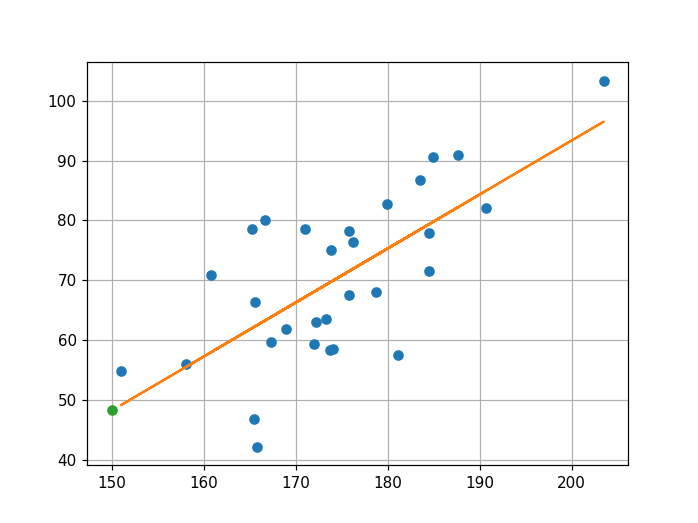

In [28]:
plt.plot(altura,peso,"o")
plt.plot(altura,aprox.intercept+aprox.slope*altura,"-")
plt.plot(x,y,"o")
plt.grid()
plt.show()

12. El conjunto de datos proviene del repositorio UCI Machine Learning y está relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo de la clasificación es predecir si el cliente se suscribirá (1/0) a un depósito a plazo (variable y). El conjunto de datos se puede descargar desde aquí.

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [51]:
!ls

ExamenMod.ipynb suscripcion.csv


In [54]:
import os
import pandas as pd

suscripcion =pd.read_csv(os.path.join("suscripcion.csv"))
print(suscripcion.columns)

labels= suscripcion.y.values
features=suscripcion[["age","default","housing","loan","cons_price_idx","cons_conf_idx"]]

features.head()
pd.get_dummies(features).head()
features_dummies=pd.get_dummies(features,columns=["default","housing","loan"])
features_dummies.head(n=16)

data=features_dummies.values
data[0]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

train_data,test_data,train_labels,test_labels =train_test_split(data,labels,random_state=0)
imp=Imputer()
imp.fit(train_data)
train_data_finite=imp.transform(train_data)
test_data_finite=imp.transform(test_data)

np.isnan(train_data_finite).any()

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(train_data_finite,train_labels)

print("Logistic Regression Score:%f"% lr.score(test_data_finite, test_labels))


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
Logistic Regression Score:0.889191


### Input variables

- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)


### Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)